# Import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Files

In [2]:
senior_data = pd.read_csv("C:\\CSE\\Chirag-Rao-KV\\Task 2.2\\Seniors.csv")
#drop non numeric columns
print(senior_data)

      Unnamed: 0  Temperature (°C)  Pressure (kPa)  Temperature x Pressure  \
0              0        209.762701        8.050855             1688.769167   
1              1        243.037873       15.812068             3842.931469   
2              2        220.552675        7.843130             1729.823314   
3              3        208.976637       23.786089             4970.736918   
4              4        184.730960       15.797812             2918.345014   
...          ...               ...             ...                     ...   
2495        2495        194.332813       22.269402             4327.675524   
2496        2496        240.467829       15.981486             3843.033197   
2497        2497        244.866196       24.901641             6097.570183   
2498        2498        138.314203       10.700640             1480.050534   
2499        2499        232.434847        6.374536             1481.664374   

      Material Fusion Metric  Material Transformation Metric  Q

# Correlation Table 
drop irrelevant columns which have low coorelation with quality rating

                                Unnamed: 0  Temperature (°C)  Pressure (kPa)  \
Unnamed: 0                        1.000000          0.012284        0.013340   
Temperature (°C)                  0.012284          1.000000       -0.009883   
Pressure (kPa)                    0.013340         -0.009883        1.000000   
Temperature x Pressure            0.009842          0.585975        0.771878   
Material Fusion Metric            0.013677          0.975767        0.160815   
Material Transformation Metric    0.010192          0.970969       -0.009420   
Quality Rating                    0.003135         -0.470129        0.016942   

                                Temperature x Pressure  \
Unnamed: 0                                    0.009842   
Temperature (°C)                              0.585975   
Pressure (kPa)                                0.771878   
Temperature x Pressure                        1.000000   
Material Fusion Metric                        0.703844   
Material Tr

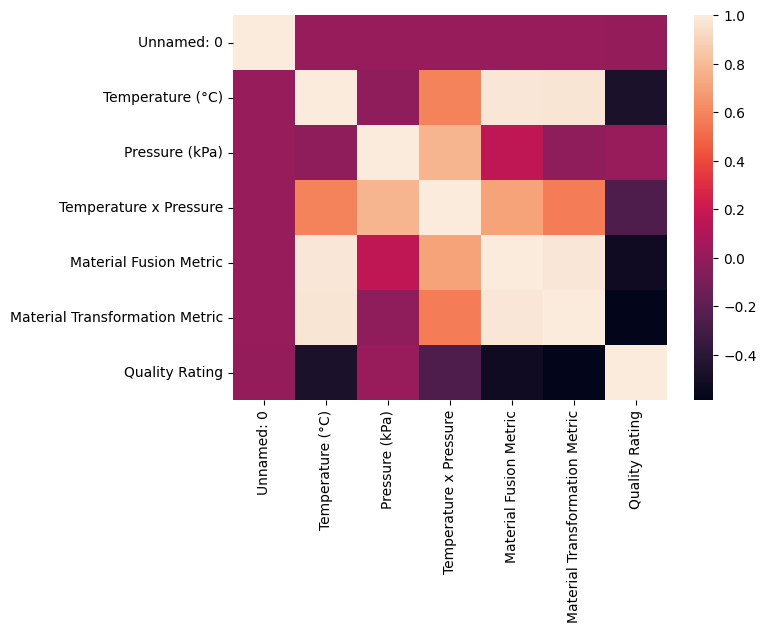

In [3]:

numeric_columns = senior_data.select_dtypes(include=[np.number]).columns
numeric_columns = senior_data.columns
senior_file_numeric = senior_data[numeric_columns]
correlation_matrix = senior_file_numeric.corr()
print(correlation_matrix)

plt.figure(figsize=(7, 5))  # Adjust the size of the plot
sns.heatmap(correlation_matrix)
plt.show()

columns_to_drop = ['Pressure (kPa)', 'Unnamed: 0']
columns = senior_data.columns
columns = [item for item in columns if item not in columns_to_drop]


# Select relevant features

In [4]:
data =senior_data[columns]
print(f"Features : \n {data}")


Features : 
       Temperature (°C)  Temperature x Pressure  Material Fusion Metric  \
0           209.762701             1688.769167            44522.217074   
1           243.037873             3842.931469            63020.764997   
2           220.552675             1729.823314            49125.950249   
3           208.976637             4970.736918            57128.881547   
4           184.730960             2918.345014            38068.201283   
...                ...                     ...                     ...   
2495        194.332813             4327.675524            48809.223549   
2496        240.467829             3843.033197            61906.574136   
2497        244.866196             6097.570183            75400.755993   
2498        138.314203             1480.050534            20356.081611   
2499        232.434847             1481.664374            54284.985490   

      Material Transformation Metric  Quality Rating  
0                       9.229576e+06       

# Add higher order to features


In [5]:
def higher_order(x, order, feature):
    x = x.copy()
    for i in range(2, order+1):
        x[f'{feature}^{i}'] = x[feature] ** i 
    return x 

order = 6
data = higher_order(data,order,'Temperature (°C)')
data = higher_order(data,order,'Temperature x Pressure')
data = higher_order(data,order,'Material Fusion Metric')
data = higher_order(data,order,'Material Transformation Metric')

print(data.columns)


Index(['Temperature (°C)', 'Temperature x Pressure', 'Material Fusion Metric',
       'Material Transformation Metric', 'Quality Rating',
       'Temperature (°C)^2', 'Temperature (°C)^3', 'Temperature (°C)^4',
       'Temperature (°C)^5', 'Temperature (°C)^6', 'Temperature x Pressure^2',
       'Temperature x Pressure^3', 'Temperature x Pressure^4',
       'Temperature x Pressure^5', 'Temperature x Pressure^6',
       'Material Fusion Metric^2', 'Material Fusion Metric^3',
       'Material Fusion Metric^4', 'Material Fusion Metric^5',
       'Material Fusion Metric^6', 'Material Transformation Metric^2',
       'Material Transformation Metric^3', 'Material Transformation Metric^4',
       'Material Transformation Metric^5', 'Material Transformation Metric^6'],
      dtype='object')


# Z scale all values


In [6]:
data_normalized = data.apply(lambda x: (x - x.mean()) / x.std(), axis=0)

print(f"After Z-scale normalization:\n{data_normalized}")

After Z-scale normalization:
      Temperature (°C)  Temperature x Pressure  Material Fusion Metric  \
0             0.155400               -0.874360               -0.160595   
1             0.723081                0.599678                0.608449   
2             0.339479               -0.846268                0.030797   
3             0.141989                1.371406                0.363505   
4            -0.271647               -0.032993               -0.428910   
...                ...                     ...                     ...   
2495         -0.107837                0.931376                0.017629   
2496          0.679235                0.599747                0.562129   
2497          0.754272                2.142469                1.123126   
2498         -1.063526               -1.017181               -1.165260   
2499          0.542191               -1.016076                0.245275   

      Material Transformation Metric  Quality Rating  Temperature (°C)^2  \
0     

# Devide data into test and train

In [7]:
# Shuffle the data
data_shuffled = data_normalized.sample(frac=1, random_state=42,).reset_index(drop=True)
fraction = 0.7
# Split the data
train_size = int(fraction * len(data))
train_data = data_shuffled[:train_size]
test_data= data_shuffled[train_size:]

print("Train Data:\n", train_data)
print("\nTest Data:\n", test_data)


Train Data:
       Temperature (°C)  Temperature x Pressure  Material Fusion Metric  \
0             0.702136               -0.055398                0.489997   
1            -0.211188               -0.645768               -0.486304   
2             0.027135                0.144314               -0.149845   
3             1.358994                2.041031                1.652552   
4             1.375820                2.382029                1.778753   
...                ...                     ...                     ...   
1745         -0.697826               -0.811621               -0.893021   
1746         -0.905474               -0.206233               -0.861226   
1747          0.511573               -0.521026                0.236290   
1748         -0.295405                1.035523               -0.007599   
1749         -0.380347               -0.775625               -0.643868   

      Material Transformation Metric  Quality Rating  Temperature (°C)^2  \
0                     

# Get Train and test data post Z scale down

In [8]:
columns_to_drop = ['Pressure (kPa)','Unnamed: 0','Quality Rating']
columns = train_data.columns
columns = [item for item in columns if item not in columns_to_drop]
print(columns)
x_train = train_data[columns].values
y_train = train_data['Quality Rating'].values

x_test = test_data[columns].values
y_test = test_data['Quality Rating'].values
print(f"\nX TRAIN - \n {x_train}")
print(f"\nY TRAIN - \n {y_train}")
print(f"\nX TEST - \n {x_test}")
print(f"\nY TEST - \n {y_test}")

['Temperature (°C)', 'Temperature x Pressure', 'Material Fusion Metric', 'Material Transformation Metric', 'Temperature (°C)^2', 'Temperature (°C)^3', 'Temperature (°C)^4', 'Temperature (°C)^5', 'Temperature (°C)^6', 'Temperature x Pressure^2', 'Temperature x Pressure^3', 'Temperature x Pressure^4', 'Temperature x Pressure^5', 'Temperature x Pressure^6', 'Material Fusion Metric^2', 'Material Fusion Metric^3', 'Material Fusion Metric^4', 'Material Fusion Metric^5', 'Material Fusion Metric^6', 'Material Transformation Metric^2', 'Material Transformation Metric^3', 'Material Transformation Metric^4', 'Material Transformation Metric^5', 'Material Transformation Metric^6']

X TRAIN - 
 [[ 0.70213561 -0.05539801  0.48999689 ... -0.21514097 -0.29898623
  -0.33889043]
 [-0.21118772 -0.645768   -0.48630402 ... -0.52829095 -0.48122065
  -0.44250326]
 [ 0.0271352   0.14431395 -0.14984464 ... -0.50604077 -0.47280141
  -0.43946018]
 ...
 [ 0.51157325 -0.52102577  0.23628967 ... -0.35783998 -0.39379

# Define necessary functions


In [9]:
def function(w, b, x):
    return np.dot(x, w) + b

def cost_fun(w, b, x, y, lam):  # Cost function
    m = x.shape[0]  # Number of training examples(rows)
    total_cost = 0
    for i in range(m):
        total_cost += (function(w, b, x[i]) - y[i])**2    # Squared error
    sum_weights = np.sum(w**2) #sum of square of weights
    # Cost with regularization
    return (1 / (2 * m)) * (total_cost + lam * sum_weights)

def gradient_descent(w, b, x, y, a, iteration,lam):   
    cost_his = []
    m = x.shape[0]
    for j in range(iteration):
        dj_dw = np.zeros_like(w)  # Initialize gradient for w
        dj_db = 0  # Initialize gradient for b
        
        F = function(w,b,x)
        dj_dw += np.dot((F - y),x)  
        dj_db = np.sum(F - y)
      
        w = w - (1/m) *a * (dj_dw + lam * w)
        b = b - (1/m) * a * dj_db
        cost = cost_fun(w,b,x,y,lam)
        cost_his.append(cost)
    return w, b,cost_his

def Rsquare(y,y_predict):
    ssr = np.sum((y-y_predict)**2)
    sst = np.sum((y - y.mean())**2)
    return 1-(ssr/sst)

# Initialization of variables
previous errors and other notes - 

  a (learning rate) cannot be more than 0.001 -  RuntimeWarning: overflow encountered in scalar add
  total_cost += (function(w, b, x[i]) - y[i])**2    # Squared error

  lambda = 0 gives better results, but kept at 1 to generalize results
  
  order = 7 gets higher R square value (0.9), but dropped due to overfitting

In [10]:
m = x_train.shape[1]
w = np.zeros(m)
b = 0
a = 0.001
ite = 6000
lam = 2

# Run gradient descent 
Caliculate the cost function and Rsquare value to determine performance of model.

In [11]:
print(f"for division in data - {fraction}\nItirations = {ite}\norder = {order}")

w, b,cost_his = gradient_descent(w, b, x_train, y_train, a, ite,lam)
final_cost_train = cost_fun(w, b, x_train, y_train,lam)
final_cost_test = cost_fun(w, b, x_test, y_test,lam)
rsquare_train = Rsquare(y_train,function(w,b,x_train))
rsquare_test = Rsquare(y_test,function(w,b,x_test))

print("\nOUTPUT\n")
print(f"Final value of \nw = {w}, \nb = {b} \nfor a = {a}\n")
    
print(f"Final value of cost function for Train = {final_cost_train}")  
print(f"Final value of cost function for Test = {final_cost_test}")   

print(f"\nR square value for Train data  {rsquare_train}")
print(f"\nR square value for Test data  {rsquare_test}")

for division in data - 0.7
Itirations = 6000
order = 6

OUTPUT

Final value of 
w = [-1.61145218e-02 -3.21397106e-02  1.04283503e-02  6.15178860e-02
  3.09506990e-02  6.15158357e-02  7.39347769e-02  6.95408133e-02
  5.10405189e-02  4.14262248e-04  2.00791676e-02  2.73038834e-02
  2.44353437e-02  1.40610324e-02  5.73935500e-02  5.14317728e-02
  7.28584496e-03 -5.90243696e-02 -1.35759876e-01  5.10398735e-02
 -6.06768399e-02 -2.13067249e-01 -3.74544032e-01 -5.31194161e-01], 
b = -0.002328963637328008 
for a = 0.001

Final value of cost function for Train = 0.06495379915521886
Final value of cost function for Test = 0.05196869033136689

R square value for Train data  0.8787890348093261

R square value for Test data  0.878214902625202


# Plot Cost VS Itiration

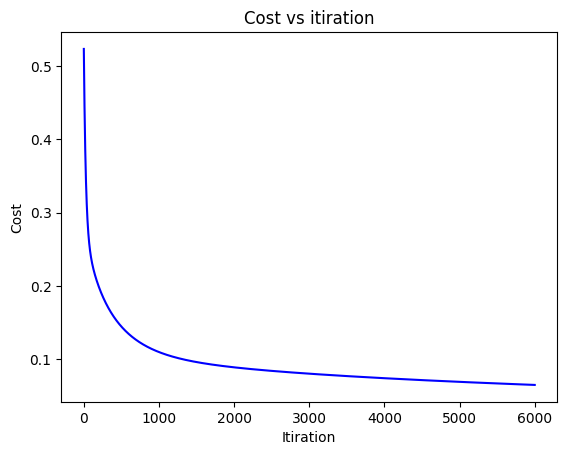

In [12]:
plt.plot(range(len(cost_his)),cost_his, color='blue')
plt.xlabel("Itiration")
plt.ylabel("Cost")
plt.title("Cost vs itiration")
plt.show()

# Plot Prediction vs Actual for Train and Test data

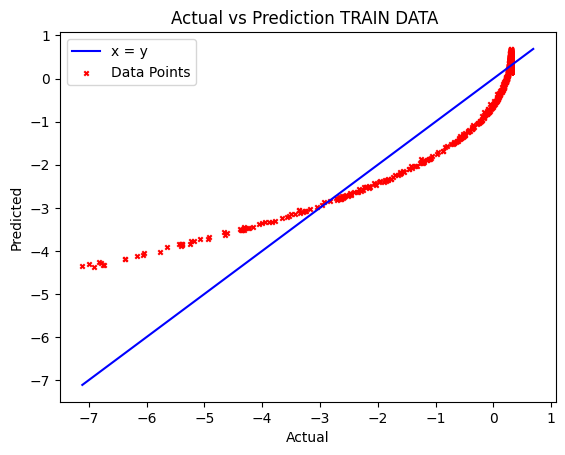

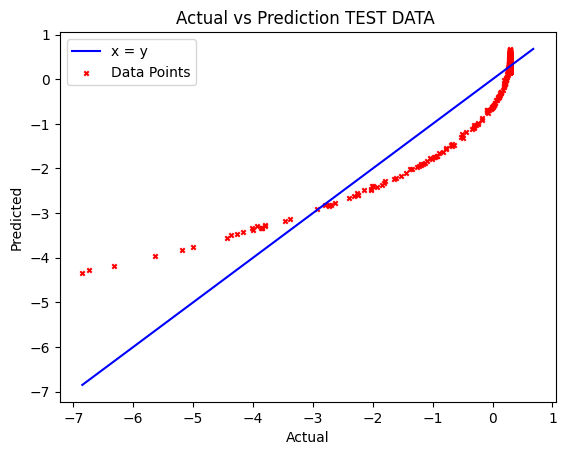

In [13]:
# X = y line for reference
y_min = min(min(y_train),min(function(w,b,x_train)))
y_max= max(max(y_train),max(function(w,b,x_train)))
y = np.linspace(y_min,y_max, 500)  # Create 500 points between min and max value
x = y  # x is equal to y
plt.plot(x,y, color = 'blue', label = 'x = y')
plt.scatter(y_train,function(w,b,x_train), color='red', marker='x', s=10, label='Data Points')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Prediction TRAIN DATA ")
plt.legend()
plt.show()
    
    
y_min = min(min(y_test),min(function(w,b,x_test)))
y_max= max(max(y_test),max(function(w,b,x_test)))
y = np.linspace(y_min,y_max, 500)  # Create 500 points between min and max value
x = y  # x is equal to y
plt.plot(x,y, color = 'blue', label = 'x = y')
plt.scatter(y_test,function(w,b,x_test), color='red', marker='x', s=10, label='Data Points')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Prediction TEST DATA ")
plt.legend()
plt.show()

# Predicting the value for Juniors data
import junior.csv 

In [14]:
junior_data = pd.read_csv("C:\\CSE\\Chirag-Rao-KV\\Task 2.2\\Juniors.csv")
print(junior_data)

      Unnamed: 0.1  Unnamed: 0  Temperature (°C)  Pressure (kPa)  \
0                0        2500        270.264688       11.023763   
1                1        2501        147.113440       24.851899   
2                2        2502        251.636694       19.861983   
3                3        2503        226.765023       23.301227   
4                4        2504        291.025207       16.896895   
...            ...         ...               ...             ...   
1452          1452        3952        156.811578       21.794290   
1453          1453        3953        197.850406        8.291704   
1454          1454        3954        241.357144       16.391910   
1455          1455        3955        209.040239       23.809936   
1456          1456        3956        163.359996       24.332133   

      Temperature x Pressure  Material Fusion Metric  \
0                2979.333789            74382.645868   
1                3656.048303            36991.316027   
2              

In [15]:
columns_to_drop = ['Pressure (kPa)','Unnamed: 0.1','Unnamed: 0','Quality Rating']
columns = list(junior_data.columns)
columns = [item for item in columns if item not in columns_to_drop]
juniors_features = junior_data[columns]

columns_to_drop = ['Unnamed: 0.1','Unnamed: 0','Quality Rating']
columns = list(junior_data.columns)
columns = [item for item in columns if item not in columns_to_drop]
#make a new dataframe and add the features (original ones)
predict_dataframe = pd.read_csv("C:\\CSE\\Chirag-Rao-KV\\Task 2.2\\Juniors.csv", usecols=list(columns))
print(predict_dataframe)


      Temperature (°C)  Pressure (kPa)  Temperature x Pressure  \
0           270.264688       11.023763             2979.333789   
1           147.113440       24.851899             3656.048303   
2           251.636694       19.861983             4998.003812   
3           226.765023       23.301227             5283.903266   
4           291.025207       16.896895             4917.422268   
...                ...             ...                     ...   
1452        156.811578       21.794290             3417.596965   
1453        197.850406        8.291704             1640.516924   
1454        241.357144       16.391910             3956.304672   
1455        209.040239       23.809936             4977.234763   
1456        163.359996       24.332133             3974.897121   

      Material Fusion Metric  Material Transformation Metric  
0               74382.645868                    1.974082e+07  
1               36991.316027                    3.183265e+06  
2               71

In [16]:

juniors_features = higher_order(juniors_features,order,'Temperature (°C)')
juniors_features = higher_order(juniors_features,order,'Temperature x Pressure')
juniors_features = higher_order(juniors_features,order,'Material Fusion Metric')
juniors_features = higher_order(juniors_features,order,'Material Transformation Metric')

print(juniors_features.columns)

Index(['Temperature (°C)', 'Temperature x Pressure', 'Material Fusion Metric',
       'Material Transformation Metric', 'Temperature (°C)^2',
       'Temperature (°C)^3', 'Temperature (°C)^4', 'Temperature (°C)^5',
       'Temperature (°C)^6', 'Temperature x Pressure^2',
       'Temperature x Pressure^3', 'Temperature x Pressure^4',
       'Temperature x Pressure^5', 'Temperature x Pressure^6',
       'Material Fusion Metric^2', 'Material Fusion Metric^3',
       'Material Fusion Metric^4', 'Material Fusion Metric^5',
       'Material Fusion Metric^6', 'Material Transformation Metric^2',
       'Material Transformation Metric^3', 'Material Transformation Metric^4',
       'Material Transformation Metric^5', 'Material Transformation Metric^6'],
      dtype='object')


# Z scale down the vaues 

In [17]:
juniors_features_normalized = juniors_features.apply(lambda x: (x - x.mean()) / x.std(), axis=0)
print(juniors_features_normalized)

      Temperature (°C)  Temperature x Pressure  Material Fusion Metric  \
0             1.244047                0.029798                1.141276   
1            -0.904937                0.495516               -0.457107   
2             0.918990                1.419057                1.003369   
3             0.484980                1.615814                0.700596   
4             1.606318                1.363600                1.788351   
...                ...                     ...                     ...   
1452         -0.735705                0.331413               -0.544712   
1453         -0.019579               -0.891583               -0.340683   
1454          0.739612                0.702154                0.640065   
1455          0.175683                1.404764                0.406591   
1456         -0.621436                0.714950               -0.281797   

      Material Transformation Metric  Temperature (°C)^2  Temperature (°C)^3  \
0                           1.3

# Predict the values and save in a 1D array

In [18]:
print(f"The finialised values of\nWeight = {w}\n\nBias = {b}\n\n")
print(juniors_features_normalized.columns)
y_predict = function(w,b,juniors_features_normalized)
print(y_predict)

The finialised values of
Weight = [-1.61145218e-02 -3.21397106e-02  1.04283503e-02  6.15178860e-02
  3.09506990e-02  6.15158357e-02  7.39347769e-02  6.95408133e-02
  5.10405189e-02  4.14262248e-04  2.00791676e-02  2.73038834e-02
  2.44353437e-02  1.40610324e-02  5.73935500e-02  5.14317728e-02
  7.28584496e-03 -5.90243696e-02 -1.35759876e-01  5.10398735e-02
 -6.06768399e-02 -2.13067249e-01 -3.74544032e-01 -5.31194161e-01]

Bias = -0.002328963637328008


Index(['Temperature (°C)', 'Temperature x Pressure', 'Material Fusion Metric',
       'Material Transformation Metric', 'Temperature (°C)^2',
       'Temperature (°C)^3', 'Temperature (°C)^4', 'Temperature (°C)^5',
       'Temperature (°C)^6', 'Temperature x Pressure^2',
       'Temperature x Pressure^3', 'Temperature x Pressure^4',
       'Temperature x Pressure^5', 'Temperature x Pressure^6',
       'Material Fusion Metric^2', 'Material Fusion Metric^3',
       'Material Fusion Metric^4', 'Material Fusion Metric^5',
       'Material Fu

# Unscale predicted data

Use the test data for standard deviation and mean

In [19]:
y_predict = y_predict * np.std(y_train) / np.mean(y_train)

# Add the predicted values to predict dataframe

In [20]:
predict_dataframe['Quality Rating'] = y_predict
print(f"Data frame with predicted Quality Rating - \n\n{predict_dataframe}")

Data frame with predicted Quality Rating - 

      Temperature (°C)  Pressure (kPa)  Temperature x Pressure  \
0           270.264688       11.023763             2979.333789   
1           147.113440       24.851899             3656.048303   
2           251.636694       19.861983             4998.003812   
3           226.765023       23.301227             5283.903266   
4           291.025207       16.896895             4917.422268   
...                ...             ...                     ...   
1452        156.811578       21.794290             3417.596965   
1453        197.850406        8.291704             1640.516924   
1454        241.357144       16.391910             3956.304672   
1455        209.040239       23.809936             4977.234763   
1456        163.359996       24.332133             3974.897121   

      Material Fusion Metric  Material Transformation Metric  Quality Rating  
0               74382.645868                    1.974082e+07       17.385008  
1   

# Save the output in a cvs file

In [21]:
predict_dataframe.to_csv("C:\\CSE\\Chirag-Rao-KV\\Task 2.2\\output.csv",index=False)
output_file = pd.read_csv("C:\\CSE\\Chirag-Rao-KV\\Task 2.2\\output.csv")
output_file

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,270.264688,11.023763,2979.333789,74382.645868,1.974082e+07,17.385008
1,147.113440,24.851899,3656.048303,36991.316027,3.183265e+06,-21.247572
2,251.636694,19.861983,4998.003812,71156.545998,1.593350e+07,-43.517833
3,226.765023,23.301227,5283.903266,64073.710961,1.166025e+07,-57.280512
4,291.025207,16.896895,4917.422268,89519.819801,2.464829e+07,242.480093
...,...,...,...,...,...,...
1452,156.811578,21.794290,3417.596965,34941.963896,3.855501e+06,-22.502407
1453,197.850406,8.291704,1640.516924,39714.857236,7.744742e+06,-37.332602
1454,241.357144,16.391910,3956.304672,62657.690952,1.405957e+07,-48.654521
1455,209.040239,23.809936,4977.234763,57195.985528,9.134036e+06,-49.540439
